<a href="https://colab.research.google.com/github/Data-Science-Apprentices/Ellie-Assignment2/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2

## Importing my Dataset
I imported my dataset from my github repository and created a datframe to use for EDA from this.

In [96]:
import pandas as pd

gp_appt_data = "https://raw.githubusercontent.com/Data-Science-Apprentices/Ellie-Assignment2/main/Appointment%20Dataset%20for%20Assignment%202%20csv.csv"

df = pd.read_csv(gp_appt_data)



In [97]:
import numpy as np
import matplotlib.pyplot as plt

# i show the first few rows to check it has been uploaded correctly

df.head(10)


,EMIS Number,Age,Gender,Appointment Date,Appointment Time,Slot Type,Session Category,Arrive Time to Send In Time,Slot Time to Send In Time,Slot Time to Arrive Time,Consultation Time
0,455,70,Male,28-Nov-25,9:20,Default,Nurse: General,NaN,NaN,5.0,NaN
1,715,64,Female,28-Nov-25,9:30,Pharmacist Pt Review,Morning Session,NaN,NaN,NaN,NaN
2,746,80,Female,28-Nov-25,11:53,URGENT DOCTOR ONLY TO BOOK,Triage/Urgent Surg,0.0,-22.0,-22.0,33.0
3,1493,81,Female,28-Nov-25,9:00,Urine only,Default List Category,0.0,266.0,266.0,7.0
4,2911,61,Male,28-Nov-25,11:15,Minor illness AM,Morning Session,16.0,3.0,-13.0,12.0
5,3111,74,Male,28-Nov-25,13:00,Tel for follow up results ONLY,Default Non-List Category,NaN,NaN,NaN,NaN
6,3112,82,Female,28-Nov-25,13:48,Flu Covid,FLU CLINIC,0.0,4.0,3.0,1.0
7,3440,84,Male,28-Nov-25,9:45,Pharmacist Pt Review,Morning Session,NaN,NaN,NaN,NaN
8,3763,38,Male,28-Nov-25,14:30,Telephone 1 week bookable,Morning Session,NaN,NaN,NaN,NaN
9,4901,77,Female,28-Nov-25,11:00,AX Face2Face same day,Triage/Urgent Surg,1.0,-4.0,-5.0,20.0


I then imported the other necessary packages and ran a code to show the first 10 rows of my dataset to ensure they had converted correctly, which they had!

## Appointment Timings Analysis - Removing data
The first set of data analysis i wanted to observe was actual appointment timings, looking at all variables available and how they compared to the age of the patient. I defined the timings of appointments separately so that they were easier to use and i could add any other columns i wanted to compare those with. I then dropped any rows that had missing data first and just used my raw data. i then ran the first 10 rows again again to check this set was correct, and then used .shape to look at how many rows had been dropped (originally had 2267).

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# columns we want to keep and look at
time_cols = ['Arrive Time to Send In Time','Slot Time to Send In Time',
            'Slot Time to Arrive Time', 'Consultation Time']

cols = ['Age', 'Gender'] + time_cols

# drop any rows with missing time/age/gender data first and naming this df for just timings
df_timings = df[cols].dropna()
print(df_timings.head(10))
print(df_timings.shape[0])

    Age  Gender  Arrive Time to Send In Time  Slot Time to Send In Time  \
2    80  Female                          0.0                      -22.0   
3    81  Female                          0.0                      266.0   
4    61    Male                         16.0                        3.0   
6    82  Female                          0.0                        4.0   
9    77  Female                          1.0                       -4.0   
10   54  Female                          0.0                       -4.0   
13   84  Female                          8.0                       -1.0   
15   64    Male                         23.0                       -1.0   
16   78  Female                         44.0                       35.0   
17   65  Female                         29.0                        6.0   

    Slot Time to Arrive Time  Consultation Time  
2                      -22.0               33.0  
3                      266.0                7.0  
4                      -

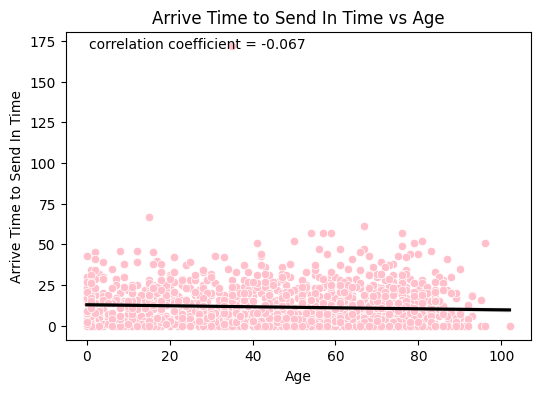

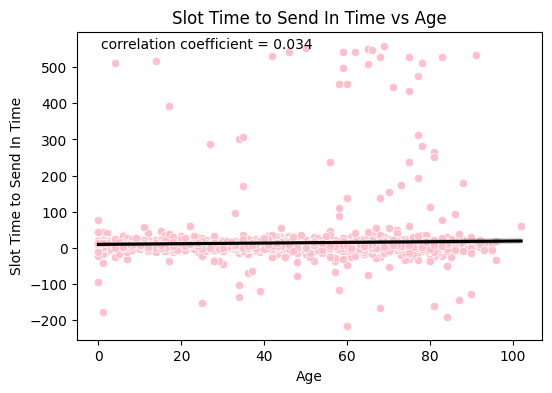

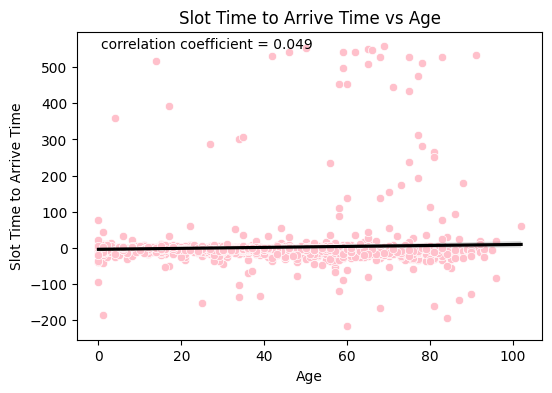

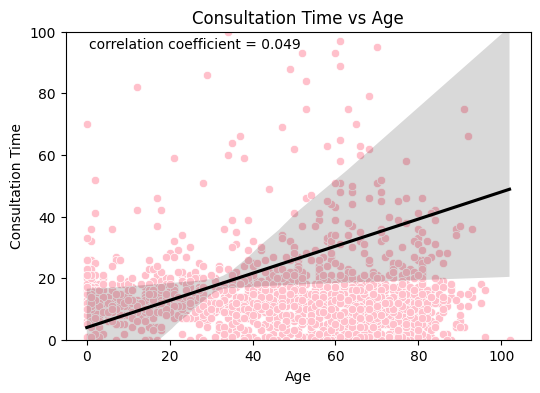

In [110]:
#first scatter and regression for age variable and show correlation coefficient
#using a for loop to run through time columns for each graph
for col in time_cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x='Age', y=col, data=df_timings, color = 'pink')
    # this plots a best fit line through my data
    sns.regplot(x='Age', y=col, data=df_timings, scatter=False, color='black')

    # calculate correlation coefficient
    corr = np.corrcoef(df_timings['Age'], df_timings[col])[0, 1]

    # adding correlation text to plot (in the correct position)
    plt.text( 0.05,
        0.98,
        f"correlation coefficient = {corr:.3f}",  transform=plt.gca().transAxes,
        verticalalignment='top',color='black')

    # applying Y-axis limit only to Consultation Time to get rid of any outliers
    if col == "Consultation Time":
        plt.ylim(0, 100)

    plt.title(f"{col} vs Age")
    plt.show()


With just the original data, we can see that comparing all the variables without the correlation coefficient, it would look like there is a clear positive correlation between age and consultation time. However, when we calculate the correlation coefficient, which cares about how consistently y changes with x, not the scale of the physical values, we can see that the coefficient is actually the exact same as the slot time- arrive. All the correlation coefficients are lower than 0.1, showing that age does not have much of an effect on appointment and arrival timings.

## Appointment Timings Analysis - Imputing data
I then wanted to use imputation for my dataset and do the exact same graph to see if there was any significant changes with the missing data being accounted for

In [100]:
# importing the package needed for imputation:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights='uniform', copy=False)

# fit and transform only the time columns as those are the ones with the mising data
df[time_cols] = imputer.fit_transform(df[time_cols])

# rounded the  values
df[time_cols] = df[time_cols].round(1)


I then re ran my code to produce 4 new graphs with the original datframe and newly imputed values to see how the correlation coefficient changed.

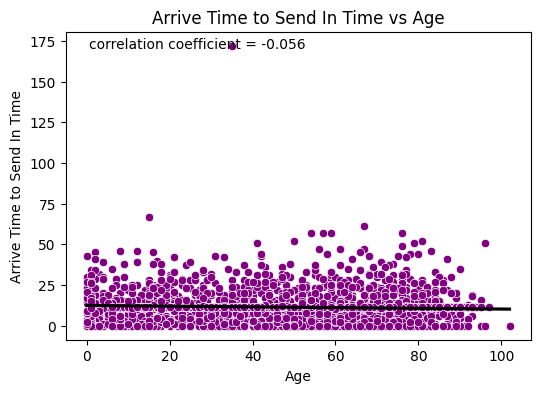

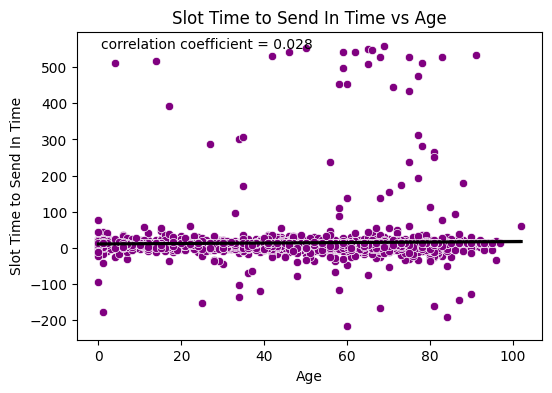

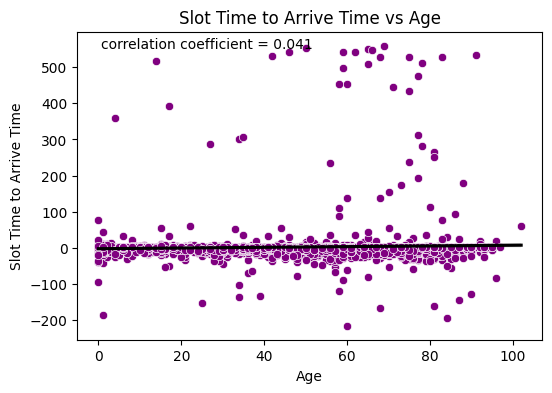

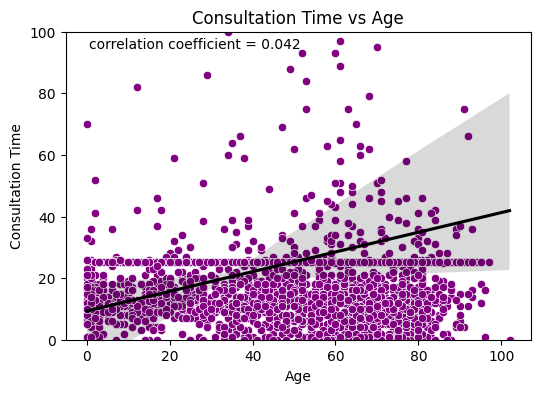

In [109]:
for col in time_cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x='Age', y=col, data=df, color = 'purple')
    # this plots a best fit line through my data
    sns.regplot(x='Age', y=col, data=df, scatter=False, color='black')

    # calculate correlation coefficient
    corr = np.corrcoef(df['Age'], df[col])[0, 1]

    # adding correlation text to plot (in the correct position)
    plt.text( 0.05,
        0.98,
        f"correlation coefficient = {corr:.3f}",  transform=plt.gca().transAxes,
        verticalalignment='top',color='black')

    # applying Y-axis limit only to Consultation Time to get rid of any outliers
    if col == "Consultation Time":
        plt.ylim(0, 100)

    plt.title(f"{col} vs Age")
    plt.show()

## Correlations between all appointment timing properties


I then wanted to use a heatmap to see which time properties had relationships with one another. I did not want to use appointment date so i removed that from my dataframe. I also removed EMIS number as that is just a patient identifier and doesnt have any significance. I then did encoding to turn Gender into numeric values, Male = 0, female = 1

/tmp/ipython-input-3669700163.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_timings['Gender'] = df_timings['Gender'].replace({'Male':0, 'Female':1})


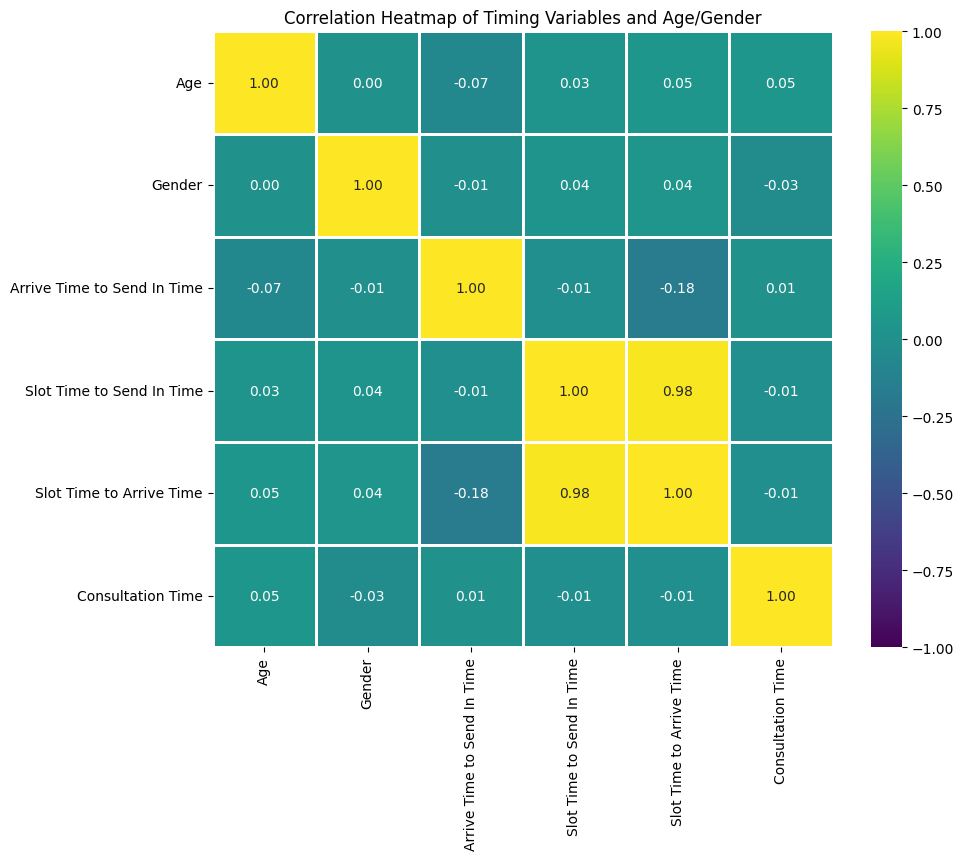

In [102]:

#first encoding gender in my timing df so it can be used in the heatmap
df_timings['Gender'] = df_timings['Gender'].replace({'Male':0, 'Female':1})

# optional: set figure size
plt.figure(figsize=(10,8))

# calculate correlation matrix
corr_matrix = df_timings.corr()

# create heatmap
sns.heatmap(corr_matrix,
           annot=True,        # show correlation numbers
           fmt=".2f",         # corr to 2 dp
           cmap="viridis",   # colour scheme
           vmin=-1, vmax=1, # scale between -1 and 1 to not skew data
           linewidths=1)  #white lines between blocks to easily differ


plt.title("Correlation Heatmap of Timing Variables and Age/Gender")
plt.show()

From this correlation heatmap we can see that most properties have no / a very weak correlation. Age and gender do not seem to have much of an impact on appointment waiting and consult times. There is a significant positive correlation between slot time - send in time and slot time - arrive time. this means that the waiting time from from when appt is compared to send in time and waiting time from arrival to time of appt are very closely linked. this makes sense as patients arrive close to their appt, and as their appt is delayed, they delay will continue to increase until they are sent in.

## Gender vs type of appointment
the next data trends i wanted to look at were between age and gender again, but this time the type of appointments they had and the times they were booked for.

Thia first graph looks at how many appointments were booked for each slot type, and whether they were more dominated by male or female patients.

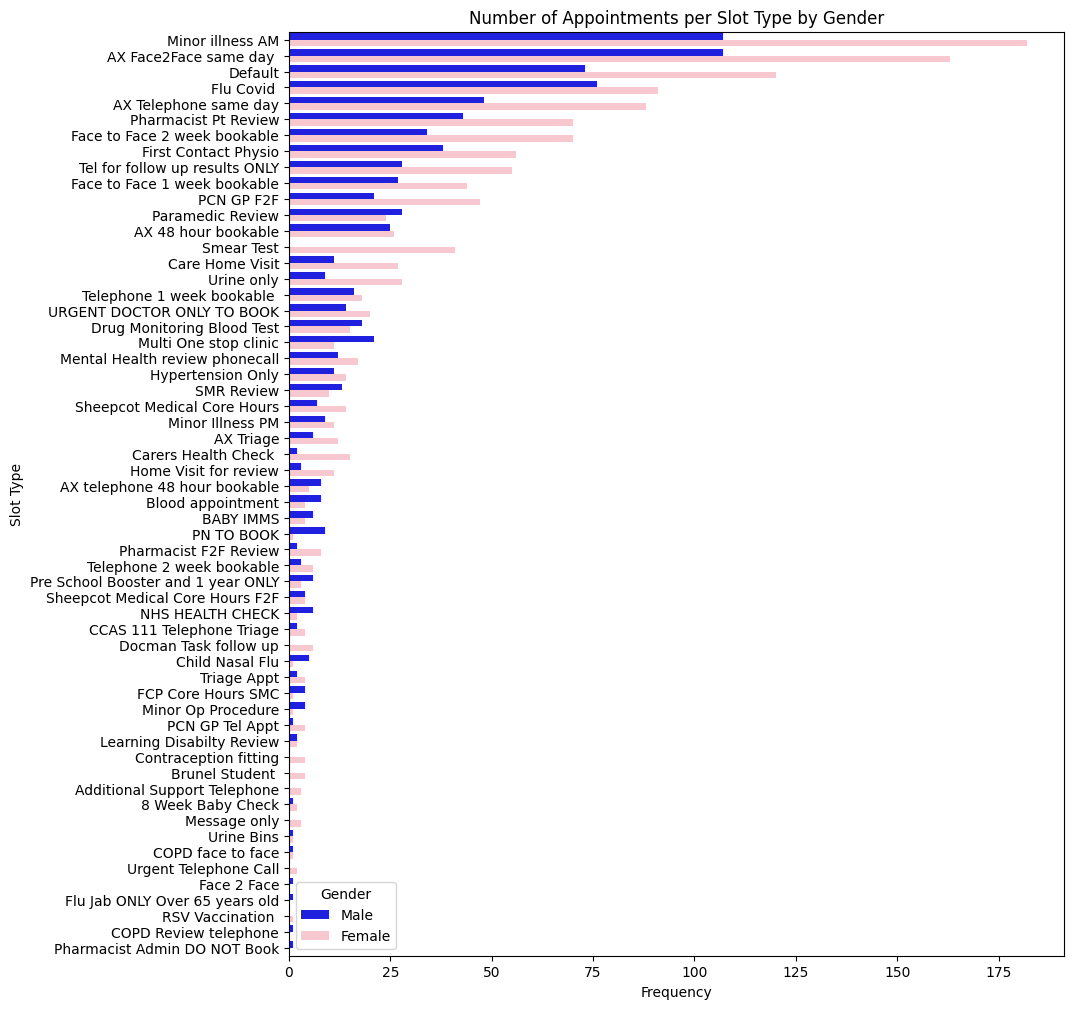

In [111]:

#encode Gender again as Male=0, Female=1
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})

#horizontal bar chart lopoking at slot type by gender with 2 colors
plt.figure(figsize=(10, 12))
sns.countplot(y='Slot Type', # this is a bar chart showing counts of each instance
              hue='Gender', #splits the bars by a categorical variable
              data=df,
              palette=['blue', 'pink'],
              order=df['Slot Type'].value_counts().index) #sort the bars by frequency

plt.title('Number of Appointments per Slot Type by Gender')
plt.xlabel('Frequency')
plt.ylabel('Slot Type')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()





From this bar chart we can see the top 3 appointment slots are minor illness AM, AX F2F same day and default. Minor illness AM is a slot for the ANP's in the practice in the morning, dealing with minor illnesses(in the name), such as chest infections, ENT issues or UTIs. the nect slot is for GP's and these are same day appointments offered to patients. The next slot is default, which are what nurse/HCA appointments are booked under. These appointments will often be for bloods, wound checks, stitches etc. All of these appointments are heavily occupied by females more than men. this analysis is useful to see which slot types are more in demand than others to determine which clinics we need more of within the practice.

## Age vs appointment booking times

The next bar chart i made was a grouped bar chart looking at appointment times, broken up by age bins.

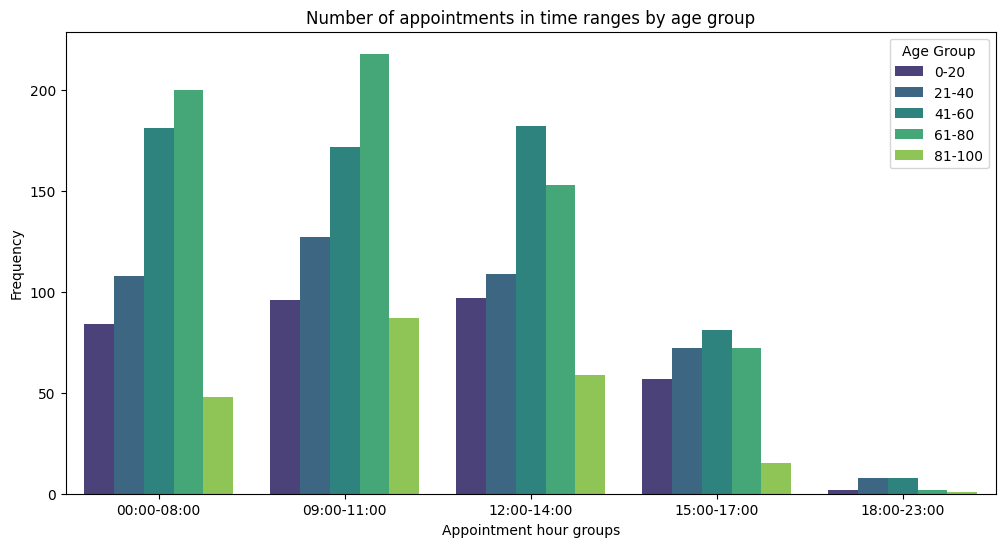

In [108]:
#converted 'Appointment Time' which is a string to datetime, then get the hour
df['Appointment Hour'] = pd.to_datetime(df['Appointment Time'], format='%H:%M').dt.hour

#created age bins
age_bins = [0, 20, 40, 60, 80, 100]
age_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
#assigns each value to a bin
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

#craeted appt time bins
hour_bins = [0, 9, 12, 15, 18, 24] #this is the intervals
hour_labels = ['00:00-08:00','09:00-11:00','12:00-14:00','15:00-17:00','18:00-23:00']
df['Appointment Hour Group'] = pd.cut(df['Appointment Hour'],
                               bins=hour_bins,
                               labels=hour_labels)


# plotting bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='Appointment Hour Group',hue='Age Group',data=df, palette='viridis',
              order=hour_labels)
plt.title('Number of appointments in time ranges by age group')
plt.xlabel('Appointment hour groups')
plt.ylabel('Frequency')
plt.legend(title='Age Group')
plt.show()

this bar chart shows that the most amount of appointments take place between 9 and 11am. this timings is also most popular for ages 61-80. age group 0-20 was very consistent, having appointments throughout working hours, similar to 21-40.  age 41-60 overtook 61-80 between 12-2 as the most frequent age bin. all ages tailed off at 3-5pm as many clinics will end at around 4pm/ less clinics in the afternoon. this bar chart also shows that most patients are between 61-80 which amke sense as older patients will be more likely to be visiting the GP surgery. there are little appointments between 6pm - 11pm as these will only be out of hours telephone calls.

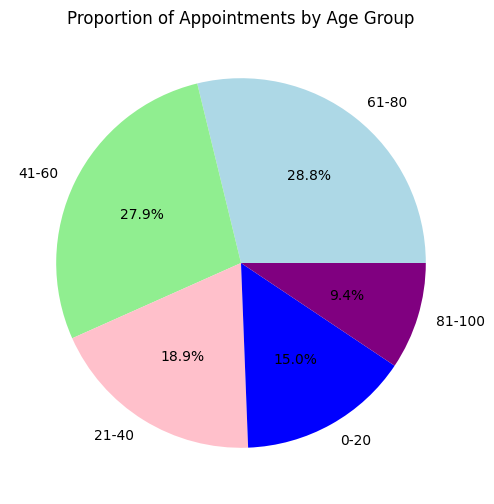

In [112]:

#as age bins have already been defined, i do not need to do again

#count appointments per age group
age_counts = df['Age Group'].value_counts() #counts all the values in each age bin

# define colors
colors = ['lightblue', 'lightgreen', 'pink', 'blue', 'purple']

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie (age_counts,labels=age_counts.index,autopct='%1.1f%%',colors=colors)
plt.title('Proportion of Appointments by Age Group')
plt.show()

This pie chart shows a clearer representation of the different age groups that take up the appointments. the highest age isnt the oldest age as not many patients will be almost 100, more likely between 61 and 80. Naturally, the percentages then decrease as you move down age groups.